In [ ]:
# Pan card fraud detection- DataFlair
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from google.colab.patches import cv2_imshow

In [ ]:
img_size = 100
datadir = r'/content/drive/MyDrive/images'    # root data directiory
CATEGORIES = os.listdir(datadir)
print(CATEGORIES)

['fake', 'real']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2 classes: ['fake', 'real']


  0%|          | 0/14 [00:00<?, ?it/s]

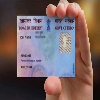

  7%|▋         | 1/14 [00:00<00:09,  1.34it/s]

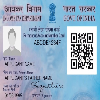

 14%|█▍        | 2/14 [00:01<00:06,  1.81it/s]

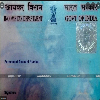

 21%|██▏       | 3/14 [00:01<00:06,  1.69it/s]

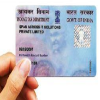

 29%|██▊       | 4/14 [00:02<00:05,  1.85it/s]

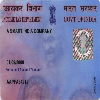

 36%|███▌      | 5/14 [00:02<00:04,  2.07it/s]

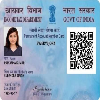

 43%|████▎     | 6/14 [00:03<00:04,  1.96it/s]

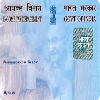

 50%|█████     | 7/14 [00:03<00:03,  1.97it/s]

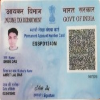

 57%|█████▋    | 8/14 [00:04<00:03,  1.80it/s]

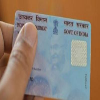

 64%|██████▍   | 9/14 [00:04<00:02,  1.92it/s]

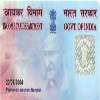

 71%|███████▏  | 10/14 [00:05<00:02,  1.88it/s]

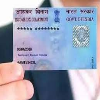

 79%|███████▊  | 11/14 [00:05<00:01,  1.88it/s]

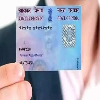

 86%|████████▌ | 12/14 [00:06<00:01,  1.73it/s]

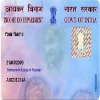

 93%|█████████▎| 13/14 [00:06<00:00,  1.93it/s]

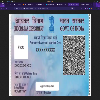

  0%|          | 0/14 [00:00<?, ?it/s]

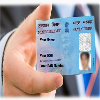

  7%|▋         | 1/14 [00:00<00:11,  1.17it/s]

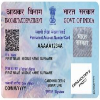

 14%|█▍        | 2/14 [00:01<00:08,  1.35it/s]

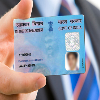

 21%|██▏       | 3/14 [00:02<00:06,  1.60it/s]

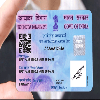

 29%|██▊       | 4/14 [00:02<00:05,  1.86it/s]

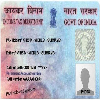

 36%|███▌      | 5/14 [00:02<00:04,  1.80it/s]

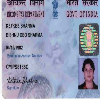

 43%|████▎     | 6/14 [00:03<00:04,  1.67it/s]

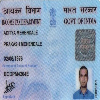

 50%|█████     | 7/14 [00:04<00:04,  1.61it/s]

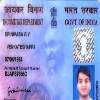

 57%|█████▋    | 8/14 [00:04<00:03,  1.74it/s]

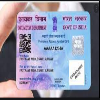

 64%|██████▍   | 9/14 [00:05<00:02,  1.77it/s]

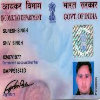

 71%|███████▏  | 10/14 [00:05<00:01,  2.00it/s]

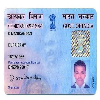

 79%|███████▊  | 11/14 [00:06<00:01,  1.65it/s]

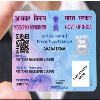

 86%|████████▌ | 12/14 [00:07<00:01,  1.71it/s]

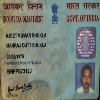

 93%|█████████▎| 13/14 [00:07<00:00,  1.75it/s]

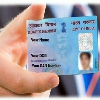

100%|██████████| 14/14 [00:08<00:00,  1.73it/s]


In [ ]:
# Preprocessing Function
def PreProcess(img_size, path):
    """This function reads images from the given folders subfolder
        and returns a normalized array along with their respective classes"""
    x, y = [], []
    CATEGORIES = os.listdir(path)
    print("Found {} classes: {}".format(len(CATEGORIES), CATEGORIES))

    for category in CATEGORIES:
        category_path = os.path.join(path, category)  # Update variable name to avoid conflict
        classIndex = CATEGORIES.index(category)

        for imgs in tqdm(os.listdir(category_path)):
            img_arr = cv2.imread(os.path.join(category_path, imgs))

            # resize the image
            resized_array = cv2.resize(img_arr, (img_size, img_size))
            cv2_imshow( resized_array)
            cv2.waitKey(1)
            # Normalize the image
            resized_array = resized_array / 255.0
            x.append(resized_array)
            y.append(classIndex)

    cv2.destroyAllWindows()
    return x, y, CATEGORIES

x, y, CATEGORIES = PreProcess(img_size, datadir)

For example, here we download and display a PNG image of the Colab logo:

In [ ]:
# Split the dataset into training and testing
X_train, x_test, Y_train, y_test = train_test_split(x, y, random_state=42)

# Convert all the list to numpy array
X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

In [ ]:
# Build the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_size, img_size, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), strides=2, activation="relu"))
model.add(Conv2D(64, (3, 3),  activation="relu"))
model.add(Conv2D(8, (3, 3), strides=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 8)         4616      
                                                                 
 dropout (Dropout)           (None, 22, 22, 8)         0         
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 50)                1

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 2, epochs=15, verbose=1)

Epoch 1/15
11/11 [==============================] - 2s 49ms/step - loss: 0.8379 - accuracy: 0.4762
Epoch 2/15
11/11 [==============================] - 1s 49ms/step - loss: 0.6928 - accuracy: 0.5714
Epoch 3/15
11/11 [==============================] - 1s 46ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 4/15
11/11 [==============================] - 1s 47ms/step - loss: 0.6932 - accuracy: 0.5238
Epoch 5/15
11/11 [==============================] - 1s 50ms/step - loss: 0.6944 - accuracy: 0.5238
Epoch 6/15
11/11 [==============================] - 1s 49ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 7/15
11/11 [==============================] - 1s 48ms/step - loss: 0.6881 - accuracy: 0.6190
Epoch 8/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6842 - accuracy: 0.7619
Epoch 9/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6864 - accuracy: 0.5238
Epoch 10/15
11/11 [==============================] - 0s 28ms/step - loss: 0.7426 - accuracy: 0.3333
Epoch 11/

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Loss')

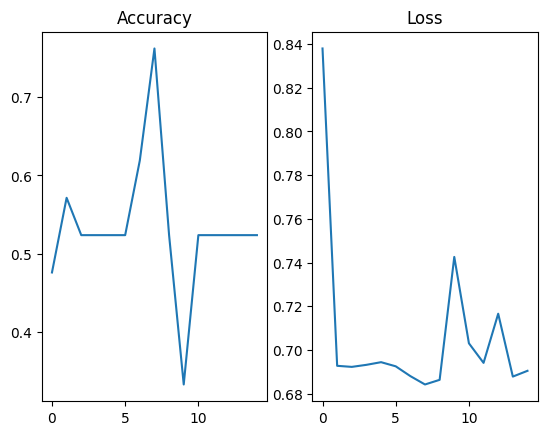

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(accuracy)
ax1.set_title("Accuracy")
ax2.plot(loss)
ax2.set_title('Loss')

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 220ms/step - loss: 0.6974 - accuracy: 0.4286


[0.6974230408668518, 0.4285714328289032]

In [ ]:
# Load images
img_real = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/cards/real.jpg'), cv2.COLOR_BGR2RGB)
img_fake = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/cards/fake.jpg'), cv2.COLOR_BGR2RGB)
real = np.expand_dims(cv2.resize(img_real, (img_size, img_size)), axis=0)/255.0
fake = np.expand_dims(cv2.resize(img_fake, (img_size, img_size)), axis=0)/255.0

Text(0.5, 1.0, 'Fake')

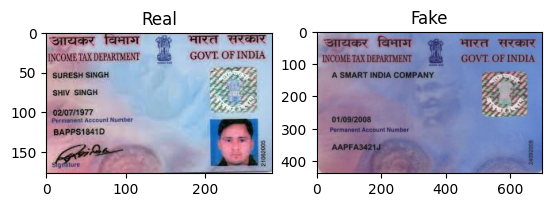

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_real)
ax1.set_title("Real")
ax2.imshow(img_fake)
ax2.set_title("Fake")

In [ ]:
# Predict from a image
pred1 = model.predict(real)
pred2 = model.predict(fake)
CATEGORIES[np.argmax(pred1)], CATEGORIES[np.argmax(pred2)]

1/1 [==============================] - 0s 25ms/step


('real', 'real')

In [ ]:
# Export the model
model.save("pan-card-fraud-detection-DataFlair.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def load_and_preprocess_image(image_path, img_size):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize
    return img

def main():
    # Load the saved model
    model = load_model('/content/pan-card-fraud-detection-DataFlair.h5')

    while True:
        # Ask the user for an image path
        image_path = input('Enter the path of the image to be checked (or type "exit" to quit): ')

        if image_path.lower() == 'exit':
            break

        try:
            # Load and preprocess the image
            img = load_and_preprocess_image(image_path, img_size=100)

            # Predict the result
            prediction = model.predict(img)
            class_index = np.argmax(prediction)

            # Display the prediction
            if class_index == 0:
                print('Prediction: Fake PAN Card')
            elif class_index == 1:
                print('Prediction: Real PAN Card')
        except Exception as e:
            print('Error:', str(e))

if __name__ == "__main__":
    main()

Enter the path of the image to be checked (or type "exit" to quit): /content/drive/MyDrive/card/Pan4.png
1/1 [==============================] - 0s 94ms/step
Prediction: Real PAN Card
Enter the path of the image to be checked (or type "exit" to quit): exit
